In [2]:
#import librerias necesarias

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import plotly.express as px
from scipy import stats
from scipy.stats import norm, skew # para estadisticas


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) # limitar flotantes a 3 decimales


from subprocess import check_output


In [3]:
df = pd.read_csv(r'Dataset\train.csv',encoding='latin-1')
df.head()

,id,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,852,Dell,Inspiron 5767,Notebook,17.300,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Linux,2.83kg,865.000
1,414,Asus,ZenBook Flip,2 in 1 Convertible,13.300,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg,928.000
2,283,Lenovo,Ideapad 320-15IKBN,Notebook,15.600,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,6GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,579.000
3,669,Acer,Aspire 3,Notebook,15.600,1366x768,Intel Core i3 6006U 2GHz,4GB,128GB SSD,Intel HD Graphics 520,Linux,2.1kg,412.000
4,1287,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.600,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_euros       912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


# Data Visualization and Feature Engineering

In [5]:
df['Inches'] = df['Inches'].apply(str)
df['Weight'] = df['Weight'].apply(lambda x: str(x).split('k')[0])

In [6]:
df['Weight'] = df['Weight'].apply(float)

Text(0.5, 1.0, 'Promedio del precio de las Laptop por compañia')

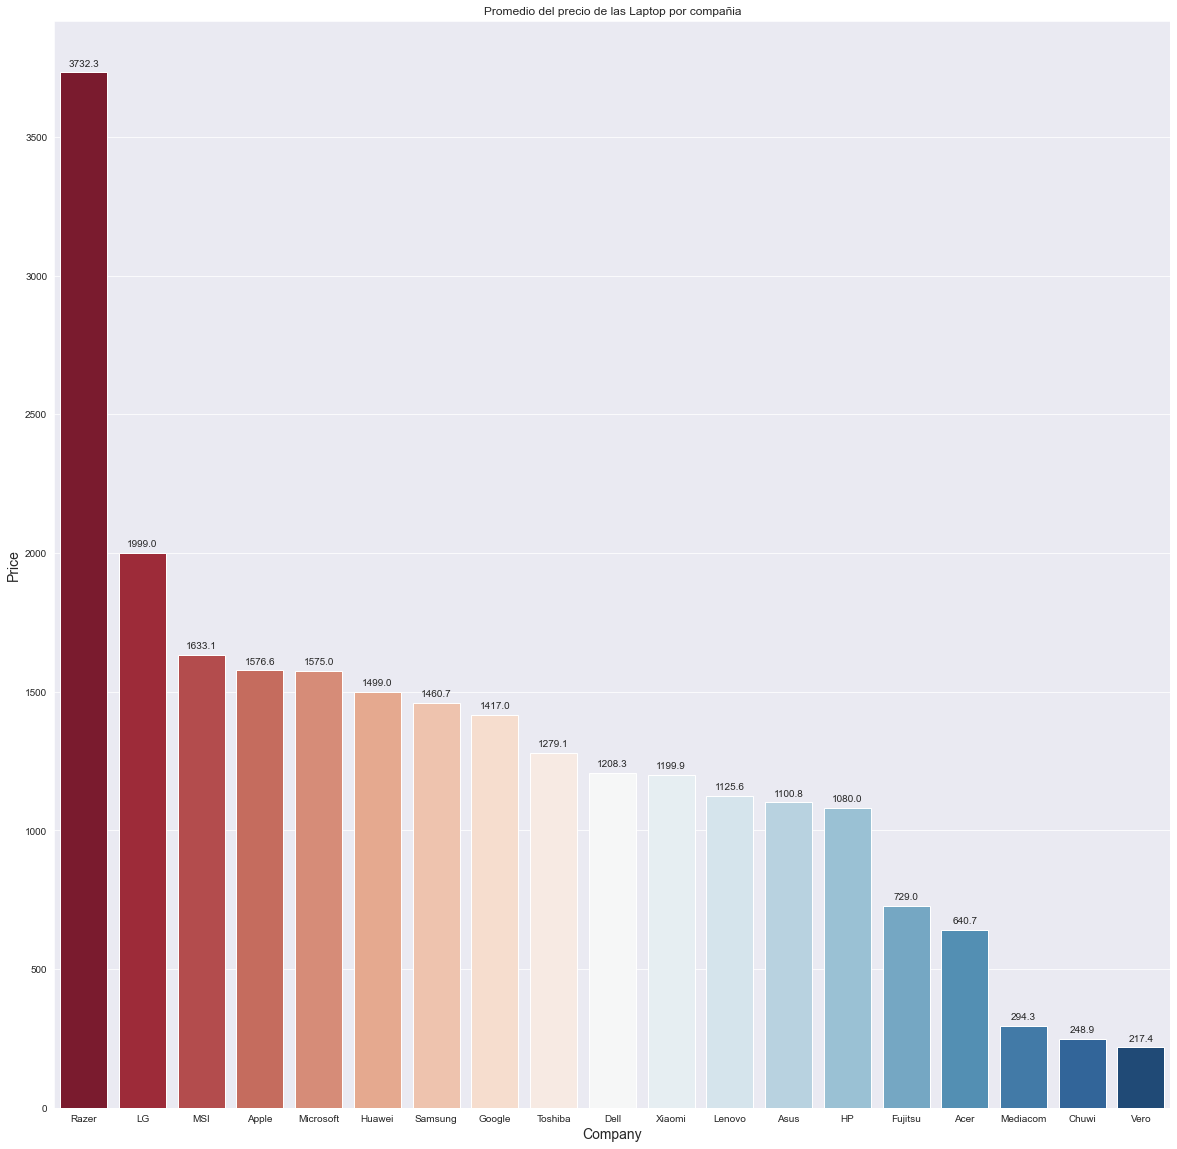

In [7]:
temp = df.groupby(['Company']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
plt.figure(figsize = (20,20))
splot = sns.barplot(data = temp,x = 'Company', y = 'Price_euros',palette = 'RdBu')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Company", size=14)
plt.ylabel("Price", size=14)
plt.title('Promedio del precio de las Laptop por compañia')

In [8]:
temp = df.groupby(['Company','Ram']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
px.scatter(data_frame = temp, x = 'Company', y = 'Price_euros',color = 'Ram',title = 'Promedio del precio de las Laptop por Company/RAM')

**Chequeamos outliers**

In [9]:
px.scatter(data_frame = df,x = 'Inches',y = 'Price_euros')

In [10]:
px.scatter(data_frame = df,x = 'Ram',y = 'Price_euros')

In [11]:
#Quitamos Outliers 
df = df[~((df['Price_euros'] > 3500) &(df['Ram'] == '8GB'))]
df = df[~((df['Price_euros'] > 3500) &(df['Ram'] == '16GB'))]

In [12]:
df = df[~((df['Price_euros'] == 4899) &(df['Inches']== 15.6))]
df = df[~((df['Price_euros'] >= 5000) &(df['Inches']== 17.3))]

> Podemos comparar fácilmente los precios de las computadoras portátiles con respecto a la RAM

In [13]:
temp = df.groupby(['Company','Memory']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
px.scatter(data_frame = temp, x = 'Memory', y = 'Price_euros',color = 'Company',title = 'Promedio del precio de las Laptop Price por Company/Memory')

In [14]:
temp = df.groupby(['Company','Inches']).mean().reset_index().sort_values(by='Price_euros',ascending=False)
px.scatter(data_frame = temp, x = 'Inches', y = 'Price_euros',color = 'Company', title = 'Promedio del precios de las Laptop Price por Company/Size')

# Comprobación de la asimetría y transformación de la columna target


 mu = 1131.36 and sigma = 701.38



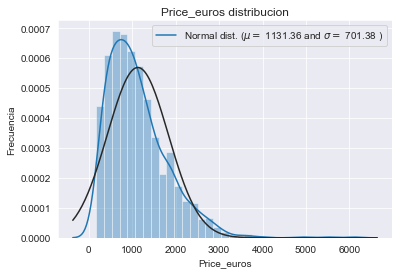

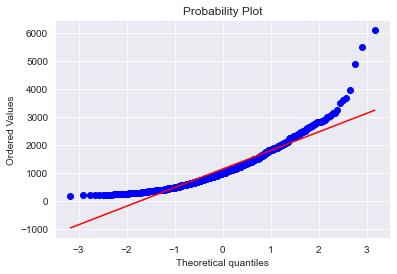

In [16]:
sns.distplot(df['Price_euros'] , fit=norm)
# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = norm.fit(df['Price_euros'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# plot de la distribucion
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Price_euros distribucion')

fig = plt.figure()
res = stats.probplot(df['Price_euros'], plot=plt)
plt.show()

**Transformacion logaritmica**


 mu = 6.85 and sigma = 0.63



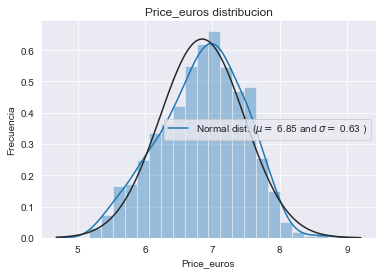

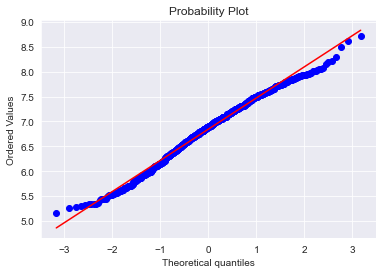

In [17]:
df["Price_euros"] = np.log1p(df["Price_euros"])

#Chequeamos la neeva distribucion 
sns.distplot(df['Price_euros'] , fit=norm);

# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = norm.fit(df['Price_euros'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#plot la distribucion
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Price_euros distribucion')

fig = plt.figure()
res = stats.probplot(df['Price_euros'], plot=plt)
plt.show()

<AxesSubplot:>

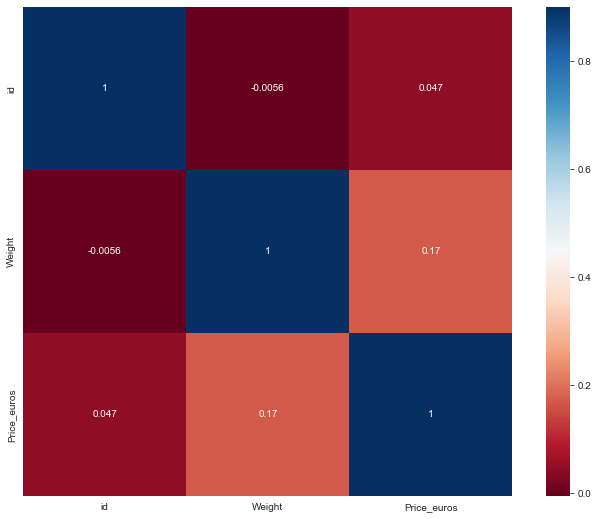

In [18]:
#Correlacion 
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap = 'RdBu',annot = True)

**No hay correlación entre el precio y otras variables y no hay intercorrelación**

In [20]:
df.drop(columns = 'id',inplace = True)

In [21]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [22]:
from sklearn.preprocessing import LabelEncoder
cols = ['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys']
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))


In [20]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,7,23,65,8,4,58,8,1.370,7.201
1,1,301,4,7,1,63,8,2,51,8,1.340,6.802
2,7,50,3,14,8,74,8,16,53,4,1.860,6.356
3,1,300,4,13,25,85,1,29,9,8,1.830,7.839
4,1,300,4,7,23,67,8,16,59,8,1.370,7.498


# Model Building

In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb


In [24]:
X = df.iloc[:,:-1]
y = df['Price_euros']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [26]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

**Linear Reggression**

In [48]:
lm = LinearRegression()
lm.fit(X_train, y_train)
score = rmsle_cv(lm)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4015 (0.0243)



**Lasso Regression**

In [27]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.4015 (0.0240)



**Elastic Net Regression**

In [28]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4015 (0.0240)



**Kernel Ridge Regression**

In [29]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3150 (0.0139)



**Gradient Boosting Regression**

In [30]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1780 (0.0182)



**XGBoost Regression**

In [49]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1, verbosity=0)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1819 (0.0222)



**LGBM**

In [64]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [65]:
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1871 (0.0198)



In [33]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.4015 (0.0240)



In [34]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3150 (0.0139)



# Fitting the best model and getting the predictions array

In [43]:
GBoost.fit(X_train,y_train)
gboost_pred = GBoost.predict(X_test)


In [44]:
result = pd.DataFrame({'Y_TEST':y_test.values,'Y_PRED' : pd.Series(gboost_pred).values})

In [45]:
result

,Y_TEST,Y_PRED
0,6.739,6.625
1,5.356,5.204
2,7.409,7.560
3,7.208,7.317
4,7.228,7.004
...,...,...
132,6.683,6.664
133,7.201,7.155
134,7.871,7.759
135,7.534,7.374


In [46]:
px.line(data_frame = result)